In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../data/customer_items.csv', parse_dates=[4],low_memory=False)


In [3]:
from datetime import timedelta
df = df[df['exchange_void_or_return']==0]
df['weekday'] = df['order_date'].dt.weekday
df['week'] = df['order_date'].dt.week
df['hour'] = df['order_date'].dt.hour
df['week_start'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)-timedelta(days=1)
df['date']= pd.to_datetime(df['order_date'].dt.date)
df=df[df['weekday']!=6]

### Perfil horario global

In [9]:
#daily = df.groupby(['date','product_name']).count()['product_quantity'].reset_index()
daily_count = df.groupby(['date','hour']).count()['product_quantity'].reset_index()
daily_sales = df.groupby(['date','hour']).sum()['total_sales_price'].reset_index()

In [11]:
hourly_p_q = daily_count.groupby(['hour']).mean().reset_index()[['hour','product_quantity']]

In [15]:
hourly_p_sales = daily_sales.groupby(['hour']).mean().reset_index()[['hour','total_sales_price']]

Cantidades vendidas

<BarContainer object of 18 artists>

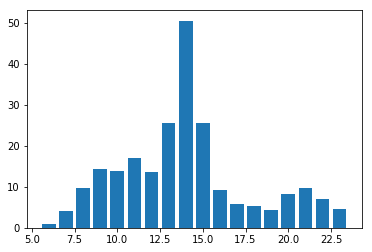

In [12]:
plt.bar(hourly_p_q['hour'],hourly_p_q['product_quantity'])

Cifra de ventas

<BarContainer object of 18 artists>

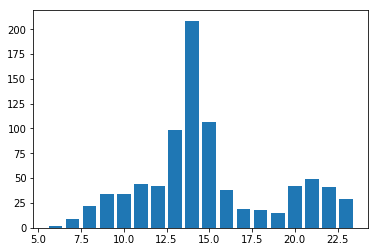

In [14]:
plt.bar(hourly_p_sales['hour'],hourly_p_sales['total_sales_price'])

### Perfil horario para un producto

In [17]:
xf = df[df['barcode']==100000004425] # Filter by product

In [18]:
#daily = df.groupby(['date','product_name']).count()['product_quantity'].reset_index()
daily_count = xf.groupby(['date','hour']).count()['product_quantity'].reset_index()
daily_sales = xf.groupby(['date','hour']).sum()['total_sales_price'].reset_index()

In [19]:
hourly_p_q = daily_count.groupby(['hour']).mean().reset_index()[['hour','product_quantity']]

In [20]:
hourly_p_sales = daily_sales.groupby(['hour']).mean().reset_index()[['hour','total_sales_price']]

Perfil horario de items vendidos

<BarContainer object of 14 artists>

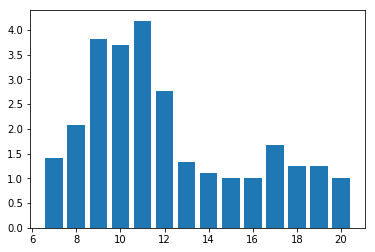

In [21]:
plt.bar(hourly_p_q['hour'],hourly_p_q['product_quantity'])

Perfil horario de cifra de ventas

<BarContainer object of 14 artists>

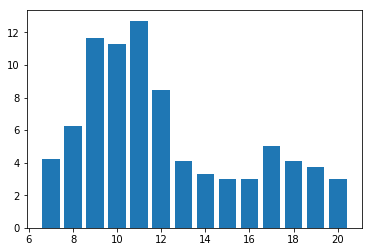

In [22]:
plt.bar(hourly_p_sales['hour'],hourly_p_sales['total_sales_price'])

### Perfil semanal global

In [24]:
daily_count = df.groupby(['date','weekday']).count()['product_quantity'].reset_index()
daily_sales = df.groupby(['date','weekday']).sum()['total_sales_price'].reset_index()

In [30]:
hourly_p_q = daily_count.groupby(['weekday']).mean().reset_index()[['weekday','product_quantity']]

<BarContainer object of 6 artists>

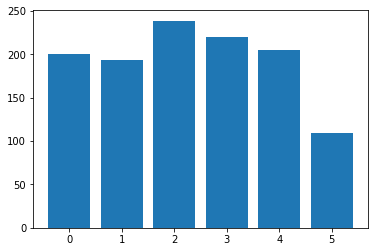

In [26]:
plt.bar(hourly_p_q['weekday'],hourly_p_q['product_quantity'])

In [27]:
hourly_p_sales = daily_sales.groupby(['weekday']).mean().reset_index()[['weekday','total_sales_price']]


<BarContainer object of 6 artists>

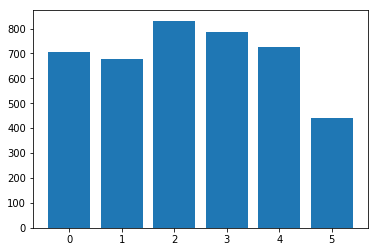

In [28]:
plt.bar(hourly_p_sales['weekday'],hourly_p_sales['total_sales_price'])

### Perfil semanal por producto

In [29]:
daily_count = xf.groupby(['date','weekday']).count()['product_quantity'].reset_index()
daily_sales = xf.groupby(['date','weekday']).sum()['total_sales_price'].reset_index()

In [31]:
hourly_p_q = daily_count.groupby(['weekday']).mean().reset_index()[['weekday','product_quantity']]

<BarContainer object of 6 artists>

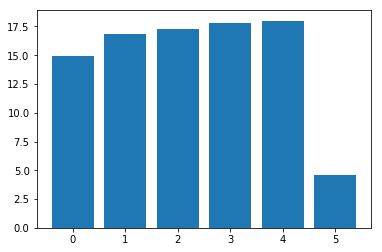

In [32]:
plt.bar(hourly_p_q['weekday'],hourly_p_q['product_quantity'])

In [35]:
hourly_p_sales = daily_sales.groupby(['weekday']).mean().reset_index()[['weekday','total_sales_price']]


<BarContainer object of 6 artists>

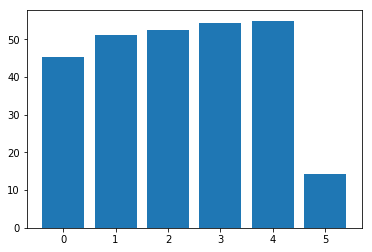

In [36]:
plt.bar(hourly_p_sales['weekday'],hourly_p_sales['total_sales_price'])

### Evolución/histórico semanal global

In [51]:
week_count = df.groupby(['week_start','hour']).count()['product_quantity'].reset_index()
week_sales = df.groupby(['week_start','hour']).sum()['total_sales_price'].reset_index()

In [52]:
week_p_q = week_count.groupby(['week_start']).mean().reset_index()[['week_start','product_quantity']]

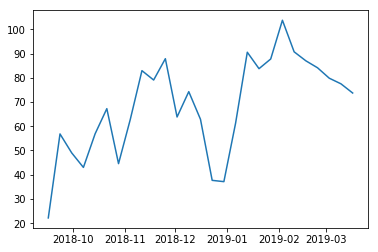

In [53]:
plt.plot(week_p_q['week_start'],week_p_q['product_quantity'])

In [54]:
week_p_sales = week_sales.groupby(['week_start']).mean().reset_index()[['week_start','total_sales_price']]


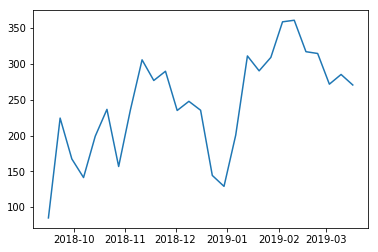

In [55]:
plt.plot(week_p_sales['week_start'],week_p_sales['total_sales_price'])

### Evolución/histórico semanal por producto

In [45]:
week_count = xf.groupby(['week_start','hour']).count()['product_quantity'].reset_index()
week_sales = xf.groupby(['week_start','hour']).sum()['total_sales_price'].reset_index()

In [46]:
week_p_q = week_count.groupby(['week_start']).mean().reset_index()[['week_start','product_quantity']]

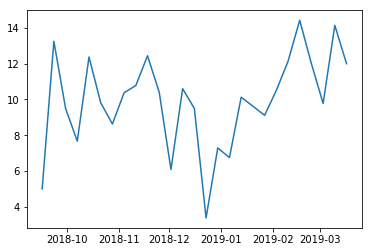

In [47]:
plt.plot(week_p_q['week_start'],week_p_q['product_quantity'])